# ch13. 데이터 시각화

## 1절. 시각화 개요
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화) ...
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스에도 내부적으로 matplotlib 사용
- seaborn : matplotlib을 기반으로 다양한 색, 테마, 차트 기능을 추가한 라이브러리

## 2절. Matplotlib
#### - https://matplotlib.org/stable/api/pyplot_summary.html<br/>
#### - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html


### 2.1 패키지 임포트 및 기본 설정

In [2]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline : 주피터노트북이 실행되는 브라우저에서 시각화를 해라...<br/>
%config InlineBackend.figure_format='retina' : 그래프 해상도를 높임. 'png'(기본값),'jpge','svg','pdf'

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 2.2 그래프 그리기

- Matplotlib 로 그래프를 그리기 위해서 다음의 단계 따른다.<br>
 1) 데이터 준비<br/>
 2) 그래프 생성<br/>
 3) 그래프 함수로 그리기<br/>
 4) 그래프 커스터마이징<br/>
 5) 그래프 출력 및 저장

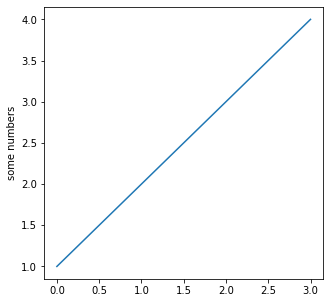

In [7]:
plt.figure(figsize=(5,5)) #그래프 객체 생성 사이즈는 인치
plt.plot([1,2,3,4]) #그래프 함수로 그리기
plt.ylabel('some numbers') #그래프 커스터마이징
plt.show()

### 2.3 그래프 영역 나누기

#### 1) subplot()함수로 서브플롯 추가

In [5]:
import numpy as np
x= np.arange(0,10,0.01)
x.shape

(1000,)

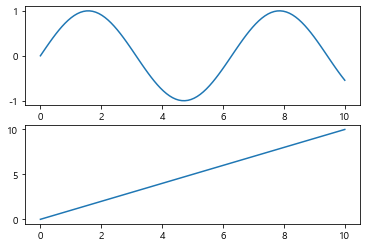

In [203]:
plt.subplot(2,1,1) #2행 1열의 subplot을 생성하고, 그 중 1번째 subplot에 plot을 그릴거야
plt.plot(x,np.sin(x))
plt.subplot(2,1,2)
plt.plot(x,x)
plt.subplot(2,2,3) #2행 2열의 subplot에서 3번째 subplot에 plot을 그릴거야
plt.plot(x,np.cos(x))
plt.subplot(2,2,4) #2행 2열의 subplot에서 4번째 subplot에 plot을 그릴거야
plt.plot(x,np.sin(x)*np.cos(x))

In [16]:
# 경고 메시지를 안 보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고메시지 안 보이게
#warnings.filterwarnings(action='default') # 경고메시지 보이게

#### 2) subplots() 함수로 서브플롯 그리기

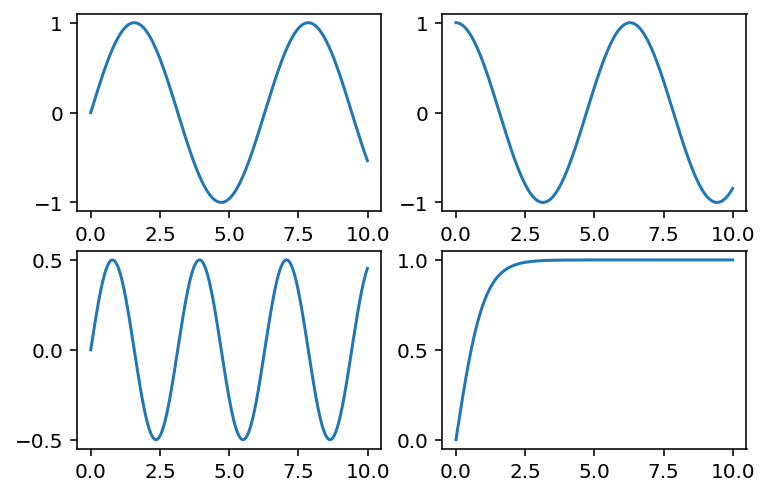

In [7]:
# 방법1 (2행2열 서브플롯)
plt.subplot(2,2,1); plt.plot(x,np.sin(x))
plt.subplot(2,2,2); plt.plot(x,np.cos(x))
plt.subplot(2,2,3); plt.plot(x,np.sin(x)*np.cos(x))
plt.subplot(2,2,4); plt.plot(x,np.tanh(x))

matplotlib.figure.Figure

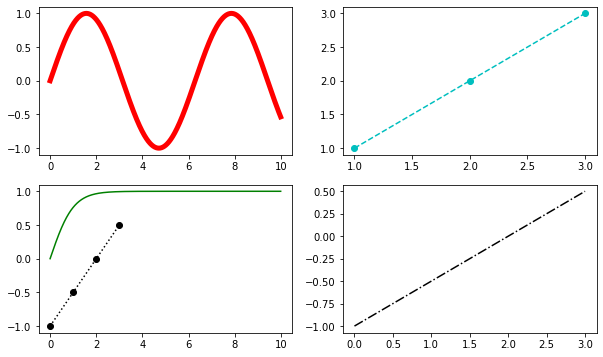

In [62]:
# 방법2 (2행2열 서브플롯)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].plot(x,np.sin(x),color='r',linewidth=5)
axes[0,1].plot([1,2,3],[1,2,3],'co--') # oc--, co-- 순서 상관없음
axes[1,0].plot(x, np.tanh(x),'g')
axes[1,0].plot([0,1,2,3],[-1,-0.5,0,0.5],'ko:')
axes[1,1].plot([0,1,2,3],[-1,-0.5,0,0.5],'k-.')
plt.plot()
type(fig)

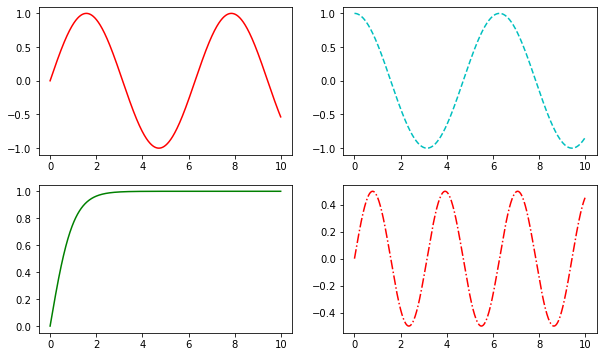

In [63]:
#방법3 (2행2열 서브플롯)
func_list=[np.sin, np.cos, np.tanh, lambda x: np.sin(x)*np.cos(x)]
fmt_list = ['r','c--','g','r-.']
fig, axes = plt.subplots(2,2,figsize=(10,6))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func_list[i](x), fmt_list[i])

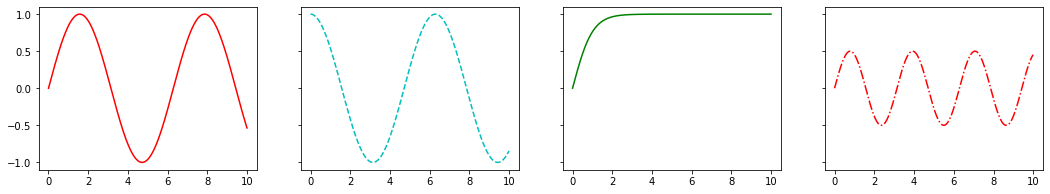

In [65]:
fig, axes = plt.subplots(ncols=4, figsize=(18,3), sharey=True) # sharey : y축 공유
for i,ax in enumerate(axes):
    ax.plot(x, func_list[i](x), fmt_list[i])

### 2.4 다양한 그래프 그리기

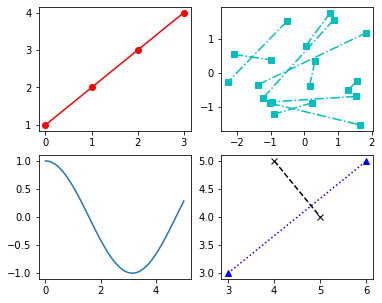

In [74]:
fig, axes = plt.subplots(2,2,figsize=(6,5))
axes[0,0].plot([1,2,3,4],'ro-')
axes[0,1].plot(np.random.randn(2,10),
              np.random.randn(2,10),
              'cs-.')
axes[1,0].plot(np.linspace(0,5),np.cos(np.linspace(0,5)))
axes[1,1].plot([3,6],[3,5],'b^:')
axes[1,1].plot([4,5],[5,4],'kx--')


#### 3) pandas.DataFrame.plot()
    plt.plot(x,y,[fmt])
    df.plot(x,y,kind='line',figsize=None, title=None, grid=None, xlim...) <br>
    * kind : line(기본값), scatter, bar, barh(수평바), hist, box, density-kde, area, pie <br>
    * figsize : tuple(인치단위) <br>
    * xlim, ylim : list/tuple

In [75]:
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

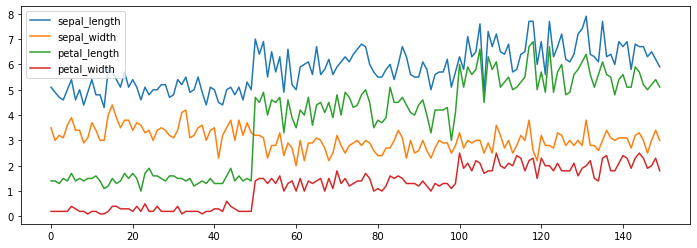

In [76]:
iris_df.plot(kind='line', figsize=(12,4))

#### 범례: https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
#### boxplot: https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC
#### color : https://matplotlib.org/stable/tutorials/colors/colormaps.html

<AxesSubplot:title={'center':'iris boxplot'}, ylabel='y-value'>

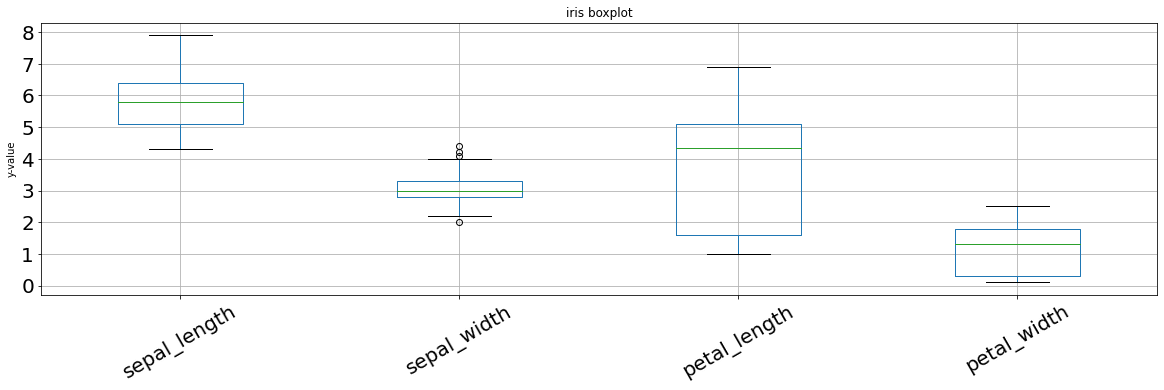

In [80]:
#iris_df.plot.box()
iris_df.plot(kind='box', figsize=(20,5), title='iris boxplot', ylabel='y-value', grid=True, fontsize=20, rot=30)

In [83]:
#iris_df에서 상관관계가 가장 높은 두 변수의 scatter plot을 그리시오
iris_df.corr() # 변수들 간의 상관계수

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

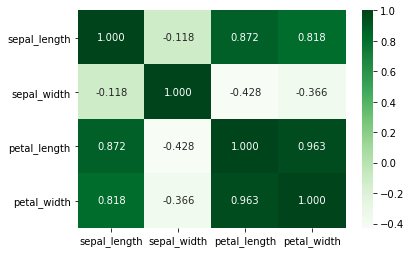

In [90]:
import seaborn as sns
sns.heatmap(iris_df.corr(), annot=True, fmt='.3f', cmap='Greens')

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

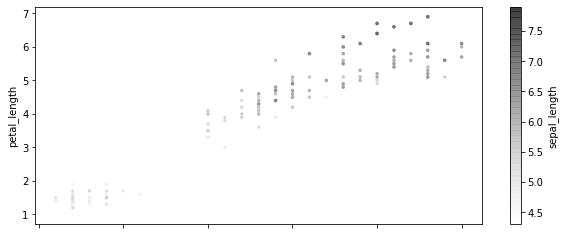

In [93]:
iris_df.plot(kind='scatter',x='petal_width', y='petal_length', figsize=(10,4),s='sepal_length',c='sepal_length',alpha=0.5)

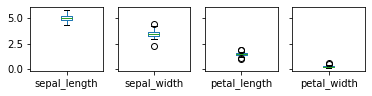

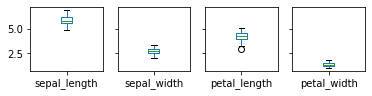

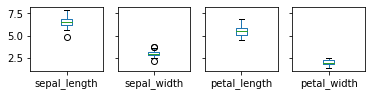

In [97]:
#종별 boxplot
iris_df.groupby(['species']).plot(kind='box',
                                 subplots=True,
                                 sharey=True,
                                  layout=(3,4))
plt.show()

#### 4) plt.scatter() : 산점도

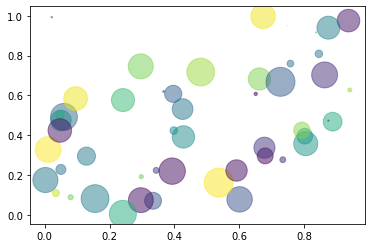

In [99]:
N=50
x=np.random.rand(N)
y=np.random.rand(N)
colors=np.random.rand(N)
area = (np.random.rand(N)*30)**2
plt.scatter(x,y,s=area, #마커(점) 크기
           c=colors, #색상
           alpha = 0.5)
plt.show()

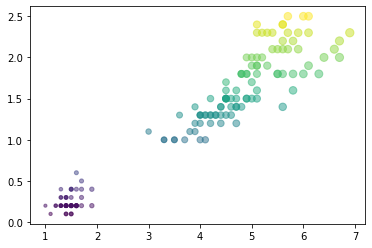

In [103]:
plt.scatter(x=iris_df.petal_length, y=iris_df.petal_width,
           s=iris_df.petal_length*10,
           c=iris_df.petal_width*20, alpha=0.5)

### 2.5 다양한 그래프 그리기
#### 1) fill(), fill_between() scatter()
#### 2) bar(), axvline(), axhline()
#### 3) hist() , boxplot(), violinplot()

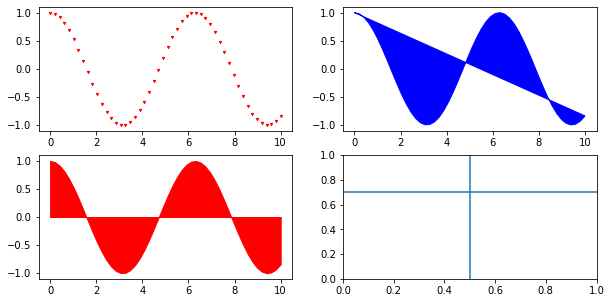

In [110]:
x=np.linspace(0,10) # 0부터 10까지 일정한 간격으로 50개 추출
y=np.cos(x)
fig, axes = plt.subplots(2,2,figsize=(10,5))
axes[0,0].scatter(x,y,s=5,c='r',marker='v')
axes[0,1].fill(x,y,c='b')
axes[1,0].fill_between(x,y,color='r')
axes[1,1].axvline(0.5)
axes[1,1].axhline(0.7)
plt.show()

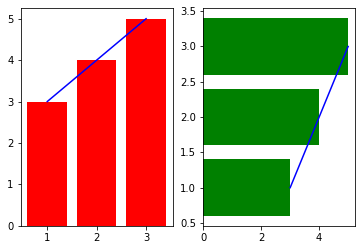

In [116]:
fit, axes = plt.subplots(ncols=2)
axes[0].bar([1,2,3],[3,4,5],color='r')
axes[0].plot([1,2,3],[3,4,5],color='b')
axes[1].barh([1,2,3],[3,4,5],color='g')
axes[1].plot([3,4,5],[1,2,3],color='b')

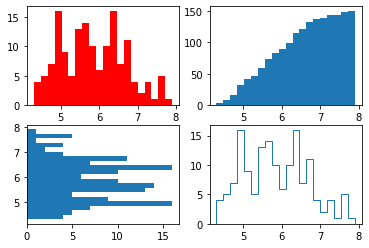

In [122]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(iris_df.sepal_length,bins=20, color='r')        # 빈도표
axes[0,1].hist(iris_df.sepal_length,bins=20, cumulative=True) # 누적빈도표
axes[1,0].hist(iris_df.sepal_length,bins=20, orientation='horizontal') # 수평빈도표
axes[1,1].hist(iris_df.sepal_length,bins=20, histtype='step')
plt.show()

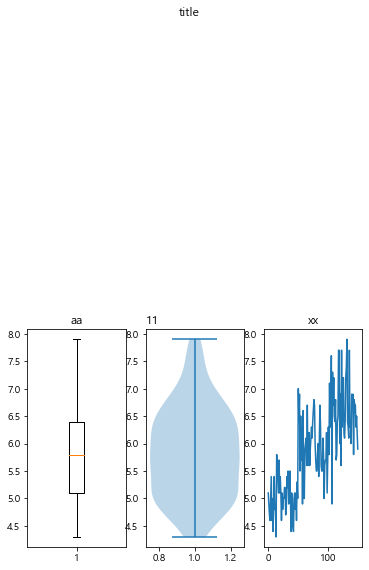

In [194]:
fig, axes = plt.subplots(1,3)
axes[0].boxplot(iris_df.sepal_length)
axes[0].set_title('aa')
axes[1].violinplot(iris_df.sepal_length)
axes[1].set_title('11',loc='left')
axes[2].plot(iris_df.sepal_length)
axes[2].set_title('xx')
plt.suptitle('title', y=2)
plt.show()

### 2.6 그래프 커스터마이징
#### 1) linestyle, linewidth
#### 2) text(), annotate()

#### 한글 폰트 설정

In [132]:
#한글 기본폰트 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
#plt.rc('fong', family='AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) #축

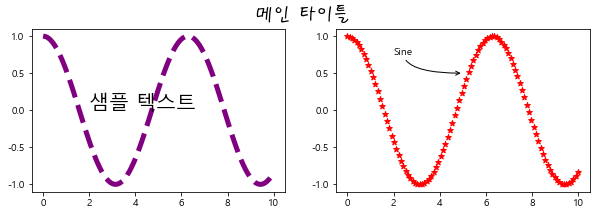

In [146]:
#원하는 한글 폰트 지정
import matplotlib.font_manager as fm
font_path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
font_prop = fm.FontProperties(fname=font_path, size=20)

x = np.linspace(0,10,100)
y = np.cos(x)
fig, axes = plt.subplots(1,2,figsize=(10,3))
axes[0].plot(x,y,linewidth=5, linestyle='--', color='purple')
axes[0].text(2,0,'샘플 텍스트', style = 'italic', fontsize=20)
axes[1].scatter(x,y, marker='*',color='r')
axes[1].annotate('Sine',xytext=(2,0.75),
                xy=(5,0.5),
                arrowprops= dict(arrowstyle='->',connectionstyle='angle3'))
plt.suptitle('메인 타이틀', fontproperties=font_prop)
plt.show()

#### 3) 수학기호
https://matplotlib.org/2.0.2/users/mathtext.html

Text(2.5, 0.5, '$\\sum_{i=0}^\\infty X_i$')

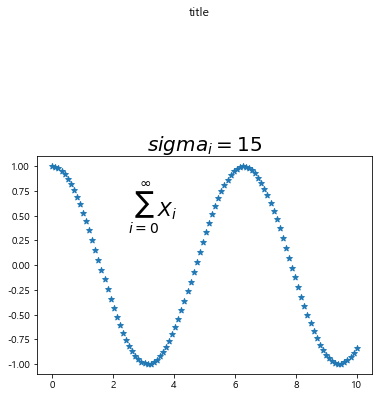

In [199]:
plt.scatter(x,y,marker='*')
plt.title(r'$sigma_i=15$',fontsize=20,pad=5)
plt.suptitle('title',y=1.4)
plt.text(2.5, 0.5, r'$\sum_{i=0}^\infty X_i$', fontsize=20)

#### 4) 축과 눈금

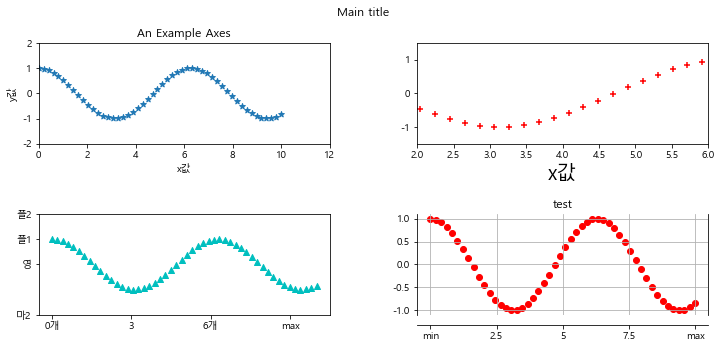

In [224]:
x = np.linspace(0,10)
y=  np.cos(x)
fig, axes = plt.subplots(2,2,figsize=(12,5))
plt.subplots_adjust(hspace=0.7, wspace=0.3)
plt.suptitle('Main title')
axes[0,0].scatter(x,y, marker='*')
axes[0,0].set(title='An Example Axes', ylabel='y값', xlabel='x값', xlim=[0,12], ylim=[-2,2])
axes[0,1].scatter(x,y,color='r',marker='+')
axes[0,1].set_xlim(2,6)
axes[0,1].set_xlabel('x값',fontsize=20)
axes[0,1].set_ylim(-1.5,1.5)
# 축 눈금 위치
axes[1,0].scatter(x,y, marker='^', c='c')
axes[1,0].set_xticks(range(0,11,3))
axes[1,0].set_xticklabels(['0개',3,'6개','max'])
axes[1,0].set_yticks([-2,0,1,2])
axes[1,0].set_yticklabels(['마2','영','플1','플2'])
axes[1,1].scatter(x,y,c='r')
axes[1,1].set(xticks=[0,2.5,5,7.5,10],xticklabels=['min',2.5,5,7.5,'max'],title='test')
axes[1,1].grid(True)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['bottom'].set_position(('outward',10))
plt.show()

#### 5) 축공유

In [228]:
x = np.arange(0,10)
y1 = 0.5*x**2
y2=-y1

Text(0.5, 0, '-Xdata')

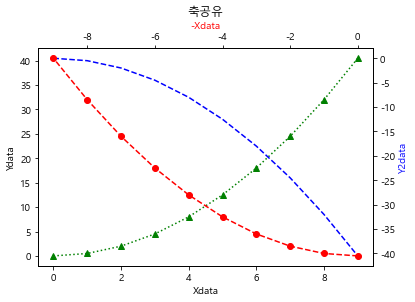

In [231]:
fig,ax1 = plt.subplots()
ax1.plot(x,y1,'g^:')
ax1.set(xlabel='Xdata', ylabel='Ydata', title='축공유')
ax2=ax1.twinx() #ax1과 x축을 공유하는 ax2
ax2.plot(x,y2,'b--')
ax2.set_ylabel('Y2data',color='b')
ax3=ax1.twiny() #ax1과 y축을 공유하는 ax3
ax3.plot(-x,y1,'ro--')
ax3.set_xlabel('-Xdata',color='r')

#### 6) 범례표시

In [235]:
x= np.arange(1,10)
y=0.2*x**2

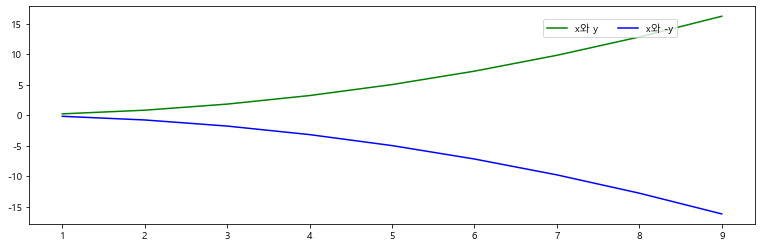

In [239]:
fig, ax = plt.subplots(figsize=(13,4,))
ax.plot(x,y,'g',label='x와 y')
ax.plot(x,-y,'b',label='x와 -y')
ax.legend()
plt.legend(loc='center right', bbox_to_anchor=(0.9, 0.9),ncol=2)
plt.savefig('data/ch13.png')